# Overall

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import qgrid

from collections import Counter
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

In [2]:
df_dm    = pd.read_csv('./data/001_demo.csv')
df_txn   = pd.read_csv('./data/002_txn.csv')
df_train = pd.read_csv('./data/003_train.csv')
df_test  = pd.read_csv('./data/004_test.csv')

In [46]:
df_dm.head()

,id,c0,c1,c2,c3,c4,n0,n1,n2
0,76371,2,7.0,97,0,1,42,NaN,40000.0
1,44326,2,4.0,97,1,1,47,10000.0,175000.0
2,33717,1,3.0,97,1,1,49,122000.0,85000.0
3,96078,2,4.0,98,1,0,37,95000.0,NaN
4,13591,2,3.0,97,0,1,40,NaN,40000.0


In [48]:
df_dm.isna().sum()*100/len(df_dm)

id     0.000000
c0     0.000000
c1     0.079614
c2     0.000000
c3     0.000000
c4     0.000000
n0     0.000000
n1    77.128687
n2     3.176064
dtype: float64

In [4]:
df_train.head()

,id,label
0,84531,3
1,25895,0
2,71109,2
3,64666,4
4,91813,8


In [5]:
df_txn.head()

,id,old_cc_no,old_cc_label,c5,c6,c7,n3,n4,n5,n6,n7,t0
0,11592,256451,10,14,10,58,296,500,159,600,3801,SWENSENScJMtTTCe11162 SILOM COMPL
1,11592,256451,10,11,-10,53,218,500,97,800,3801,-7639876683691985984
2,11592,256451,10,12,-10,58,133,700,101,300,3801,-3379897237896068718
3,11592,256451,10,11,-10,80,340,4000,95,0,3801,-7973349235111278992
4,11592,256451,10,12,11,58,306,400,124,300,3801,SIZZLER eE0E2cECENTRAL RAMA 2)


In [8]:
columns = ['c5','c6','c7','n3','n4', 'n5', 'n6', 'n7', ]
df_txn_label = pd.merge(df_train, df_txn.drop(columns,axis=1), on='id')

In [9]:
df_txn_label.head()

,id,label,old_cc_no,old_cc_label,t0
0,84531,3,262011,11,MEA ELECTRICITY PAYMENT1E1AJ1
1,84531,3,262011,11,-4436277728757949526
2,84531,3,262011,11,ADVANCED WIRELESS NETW92MmtCeem61
3,84531,3,262011,11,MEA ELECTRICITY PAYMENTeEm2c0tc
4,84531,3,262011,11,LazadaJ9HaEmj2e


In [19]:
df_txn_label['readable'] = df_txn_label['t0'].str.contains('[A-Z]+')

In [20]:
df_txn_label.head()

,id,label,old_cc_no,old_cc_label,t0,readable
0,84531,3,262011,11,MEA ELECTRICITY PAYMENT1E1AJ1,True
1,84531,3,262011,11,-4436277728757949526,False
2,84531,3,262011,11,ADVANCED WIRELESS NETW92MmtCeem61,True
3,84531,3,262011,11,MEA ELECTRICITY PAYMENTeEm2c0tc,True
4,84531,3,262011,11,LazadaJ9HaEmj2e,True


In [21]:
tmp = df_txn_label.groupby('id').sum()
tmp.head()

,label,old_cc_no,old_cc_label,readable
id,,,,
1,37440,26401853,0,2.0
2,30732,324253359,25610,123.0
3,9964,15955842,11390,38.0
4,25884,574033782,21570,0.0
5,8164,147098952,14287,48.0


In [24]:
tmp[['readable']].to_csv('./data/100_n_readable.csv')

In [29]:
df = pd.merge(df_dm, tmp[['readable']].reset_index(), on='id')

In [30]:
df = pd.merge(df, df_train, on='id')

In [31]:
df.head()

,id,c0,c1,c2,c3,c4,n0,n1,n2,readable,label
0,76371,2,7.0,97,0,1,42,NaN,40000.0,32.0,4
1,44326,2,4.0,97,1,1,47,10000.0,175000.0,38.0,12
2,33717,1,3.0,97,1,1,49,122000.0,85000.0,16.0,10
3,96078,2,4.0,98,1,0,37,95000.0,NaN,13.0,12
4,13591,2,3.0,97,0,1,40,NaN,40000.0,76.0,9


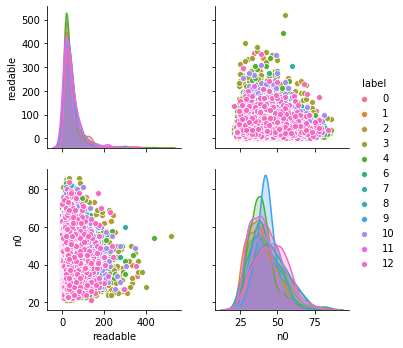

In [44]:
sns.pairplot(df.dropna(), vars=['readable', 'n0'], hue='label')

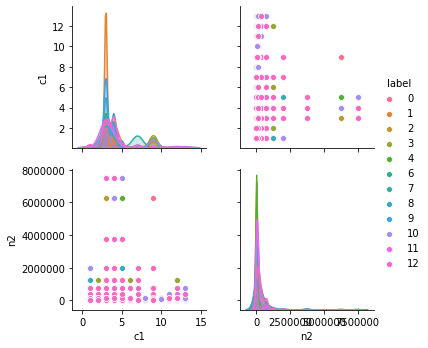

In [50]:
sns.pairplot(df.dropna(), vars=['c1', 'n2'], hue='label')